# Tusked Elephants

[Project extensions are at the bottom of this file]

The illegal ivory trade in the 1970s and 80s was so severe that some elephant populations declined by 50-90%, with poachers targeting animals with the largest tusks. Safeguard measures implemented in 1990 led to a period of population recovery. What impact did the poaching period have on the genetic trait for tusk size?

In this project you will analyze tusk size data for elephants born before the poaching period compared to elephants born after the recovery period began.

### Loading the Data

The file `male-elephant-tusk-size.csv` contains information about young male elephants from regions of East Africa: one cohort observed 1966-1968 (born before the poaching period) and a second cohort observed 2005-2013 (born after population recovery began).

Load the data and take a look.

Activity Goals:
- Load the tusk data.
- Display the dataframe.

In [65]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'male-elephant-tusk-size.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('male-elephant-tusk-size.csv')
df #display the dataframe

,period,elephant_id,age,shoulder_height,tusk_length
0,1966-68,58,2.5,149.0,30.0
1,1966-68,78,2.5,151.0,27.0
2,1966-68,86,2.5,127.0,27.0
3,1966-68,293,2.5,156.0,32.0
4,1966-68,29,3.0,146.0,28.5
...,...,...,...,...,...
294,2005-13,78,7.5,220.0,84.7
295,2005-13,144,7.5,220.0,58.9
296,2005-13,1,9.0,220.0,99.0
297,2005-13,48,9.0,230.0,105.4


Note that the `shoulder_height` column is measured in centimeters, as is `tusk_length`.
Let's explore whether tusk length changed across the two time periods.

### Comparing Tusk Length

To help us compare, let's split the data into two dataframes based on the time period. We will use a simple `query()`.

Activity Goals:
- Create a `pre_poaching` dataframe.
- Display the first 3 rows.

In [2]:
pre_poaching = df.query('period == "1966-68"')
pre_poaching.head(3)

,period,elephant_id,age,shoulder_height,tusk_length
0,1966-68,58,2.5,149.0,30.0
1,1966-68,78,2.5,151.0,27.0
2,1966-68,86,2.5,127.0,27.0


Activity Goals:
- Create a post_recovery dataframe.
- Display the first 3 rows.

In [3]:
post_recovery = df.query('period == "2005-13"')
post_recovery.head(3)

,period,elephant_id,age,shoulder_height,tusk_length
214,2005-13,52,4.5,195.0,47.0770
215,2005-13,14,5.0,200.0,48.2328
216,2005-13,42,5.0,180.0,54.0118


Now we can compare the average tusk length for the two periods.

Activity Goals:
- Calculate the average tusk length for the pre-poaching period.
- Repeat for the post-recovery period.

In [4]:
print("Before:", pre_poaching['tusk_length'].mean())
print("After:", post_recovery['tusk_length'].mean())

Before: 67.44088785046729
After: 57.968809411764695


On average, tusk lengths appear to have decreased after the poaching period. However, these simple averages do not account for the confounding factor of age. How could age possibly skew the data?

Younger elephants are generally smaller and have shorter tusks. If the average age of the elephants in the second cohort is younger, that could skew the data toward smaller tusks. We can address this by analyzing the relationships between tusk length and the overall body height.

### Tusk Length vs Shoulder Height
Let's start by creating a scatter plot of tusk length vs shoulder height for the two time periods.

Activity Goals:
- Plot tusk length vs shoulder height for both groups
- Use a triangle marker for pre_poaching.
- Use a square marker for post_recovery.

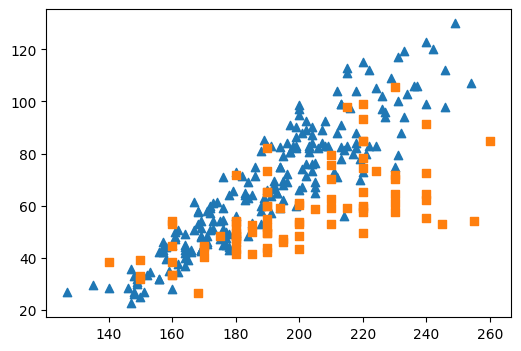

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(pre_poaching['shoulder_height'], pre_poaching['tusk_length'], marker='^')
plt.scatter(post_recovery['shoulder_height'], post_recovery['tusk_length'], marker='s')
plt.show()

Now let's format the plot to make it easier to interpret. We will label the axes and mark the two groups directly on the plot.

Activity Goals:
- Label the axes.
- Label the 2 groups directly on the plot.

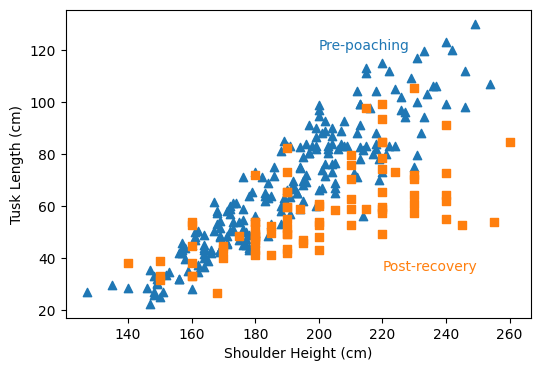

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(pre_poaching['shoulder_height'], pre_poaching['tusk_length'], marker='^')
plt.scatter(post_recovery['shoulder_height'], post_recovery['tusk_length'], marker='s')
plt.xlabel('Shoulder Height (cm)')
plt.ylabel('Tusk Length (cm)')
plt.text(x=200, y=120, s='Pre-poaching', color='C0')
plt.text(x=220, y=35, s='Post-recovery', color='C1')
plt.show()

For the same shoulder height, pre-poaching elephants generally have longer tusks.

### Modeling Tusk Length
How can we quantify the change in the relationship between the two periods? One approach is to create linear models for each period and then compare the slopes.

A linear model fits a straight line through the data, allowing us to make predictions. Since pandas does not have built-in functions for modeling, we have provided the following python class that utilizes the scikit-learn library.

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

class LinearModel:
    def __init__(self, model_name=""):
        self.model_name = model_name
        
    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x, y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_
        self.rsquared = r2_score(y, y_pred)
        
    def predict(self, x):
        return self.slope * x + self.intercept

    def plot_model(self, x_min, x_max, color="black"):
        y_min = self.predict(x_min)
        y_max = self.predict(x_max)
        plt.plot([x_min, x_max], [y_min, y_max], color=color)
        
    def print_model_info(self):
        m = self.slope
        b = self.intercept
        rsquared = self.rsquared
        model_name = self.model_name
        print(f'LinearModel({model_name}):')
        print(f'Parameters: slope = {m:.2f}, intercept = {b:.2f}')
        print(f'Equation: y = {m:.2f}x + {b:.2f}')
        print(f'Goodness of Fit (R²): {rsquared:.3f}')

First we will create a model for each time period.

Activity Goals:
- Create a linear model object for the pre-poaching data.
- Fit the linear model to the data.

In [9]:
pre_model = LinearModel("pre_poaching")
pre_model.fit(x=pre_poaching['shoulder_height'], y=pre_poaching['tusk_length'])

Activity Goals:
- Create a linear model object for the post-recovery data.
- Fit the linear model to the data.

In [10]:
post_model = LinearModel("post_recovery")
post_model.fit(x=post_recovery['shoulder_height'], y=post_recovery['tusk_length'])

Now that we have the two models, let's visualize them together.

### Plotting the models
Earlier we plotted the two scatter plots. Now we will overlay the linear models to the graph, taking advantage of the `plot_model()` method from our python class.

Activity Goals:
- Plot pre-poaching model from 140 to 250 cm shoulder height.
- Plot post-recovery model.

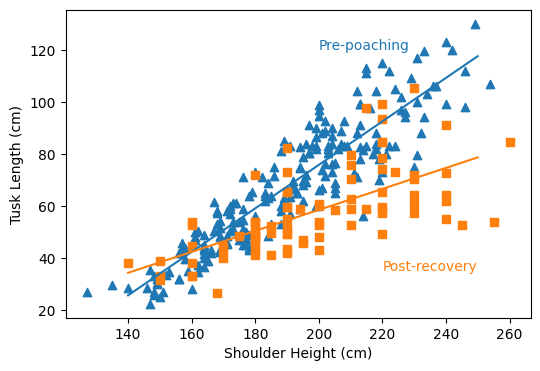

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(pre_poaching['shoulder_height'], pre_poaching['tusk_length'], marker='^')
plt.scatter(post_recovery['shoulder_height'], post_recovery['tusk_length'], marker='s')
plt.xlabel('Shoulder Height (cm)')
plt.ylabel('Tusk Length (cm)')
plt.text(200, 120, 'Pre-poaching', color='C0')
plt.text(220, 35, 'Post-recovery', color='C1')
pre_model.plot_model(140, 250, 'C0')
post_model.plot_model(140, 250, 'C1')


Looking at the two models, we see that the slope for both is positive, indicating that as elephant height increases, tusk length also increases.

Comparing the slopes of the two models, we find that the post_recovery model is shallower than the pre_poaching model.That suggests that poaching placed evolutionary pressure on tusk length, leading to elephants with shorter tusks. Let's print the equations for the two models to give us more precise insights into this relationship.

Activity Goal:
- Pre-poaching model parameters.

In [12]:
pre_model.print_model_info()

LinearModel(pre_poaching):
Parameters: slope = 0.83, intercept = -91.14
Equation: y = 0.83x + -91.14
Goodness of Fit (R²): 0.831


Activity Goal:
- Post-recovery model parameters.

In [13]:
post_model.print_model_info()

LinearModel(post_recovery):
Parameters: slope = 0.40, intercept = -22.02
Equation: y = 0.40x + -22.02
Goodness of Fit (R²): 0.431


Here, we observe that the slope prior to poaching is 0.83. After the extreme poaching event, the slope becomes shallower, at 0.40.

The targeted poaching of elephants with the longest tusks seems to have reduced the tusk length for future generations.

## Project extensions

Below are several ideas for project extensions:

1. Percent Difference Analysis
   - Utilize the model to calculate the tusk length for `pre-poaching` elephants with a shoulder height of 250 cm.

   - Perform the same calculation for `post-recovery` elephants with the same shoulder height.

   - Calculate how much longer, in percentage, the tusks of `pre-poaching` elephants are compared to `post-recovery` elephants with a 250 cm shoulder height.

2. Taller Elephants
   - Elephants can reach shoulder heights of up to 400 cm. Use the model to predict the tusk length for elephants of this height in both the `pre_poaching` and `post_recovery` cohorts.

In [78]:
# YOUR CODE HERE (add new cells as needed)